The purpose of this notebook is to achieve the first goal in the project:
* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [62]:
import os
import cv2
import glob
import pickle
import numpy as np
import pylab as plt

%matplotlib inline

In [14]:
path2calib_im = "./camera_cal/"
pattern = "*.jpg"

calib_images = glob.glob(path2calib_im + pattern)

print("We have %d images for calibration." % len(calib_images))

We have 20 images for calibration.


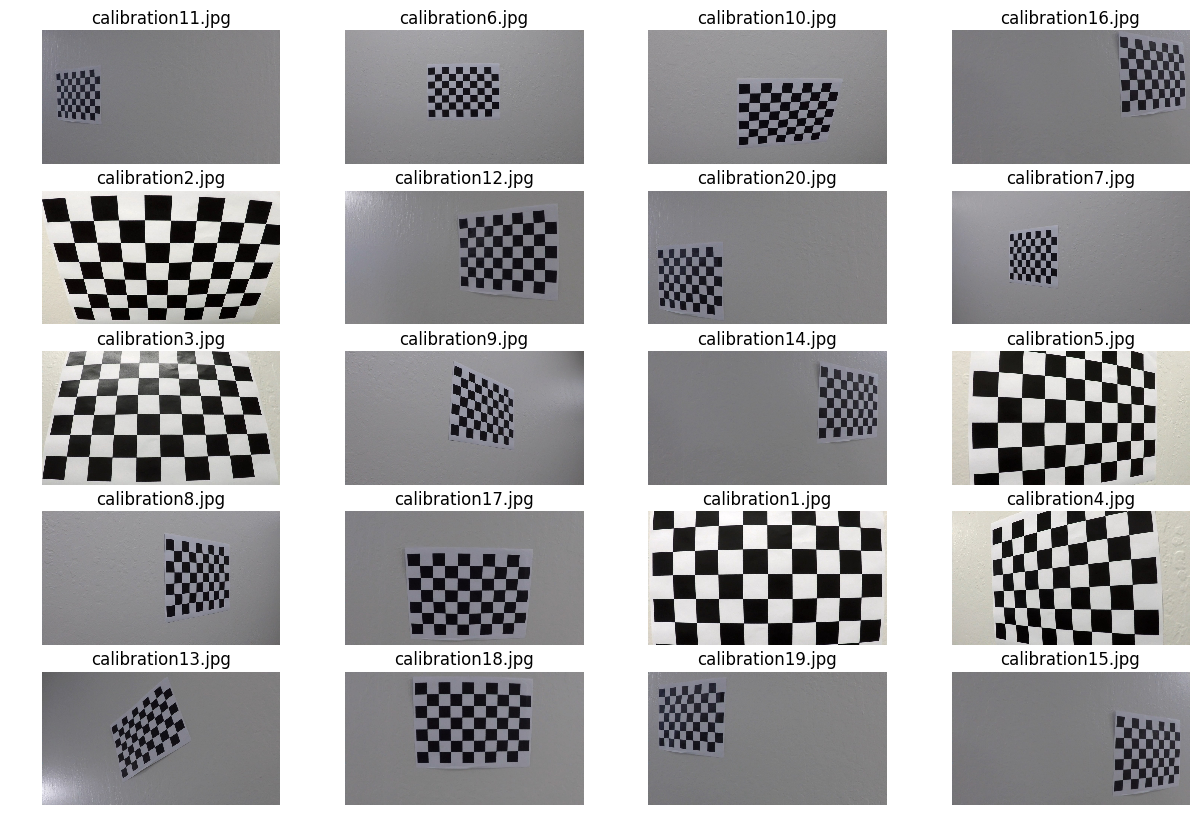

In [25]:
plt.figure(figsize=(15,10))

for num, im in enumerate(calib_images):
    temp = cv2.imread(im)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    plt.subplot(5, 4, num+1)
    plt.imshow(temp)
    plt.title(os.path.basename(im))
    _=plt.axis('off')

There are some images that present potential issues such as calibration5 and calibration1, because doesn't present the same number of corners as the rest of the images. calibration4 is exactly on the edge, if something doesn't work, it will be the first candidate to leave.

In [32]:
banned_list = ['calibration5.jpg', 'calibration1.jpg']

filtered_list = list()

for image_path in calib_images:
    appear = 0
    
    for banned in banned_list:
        if not image_path.find(banned) == -1:
            appear = 1
            
    if not appear:
        filtered_list.append(image_path)

In [34]:
# Prepare object points like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0).. (x,y,z) -> z is always 0 in 2D images

nx = 9
ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

Corners in image calibration4.jpg not found.


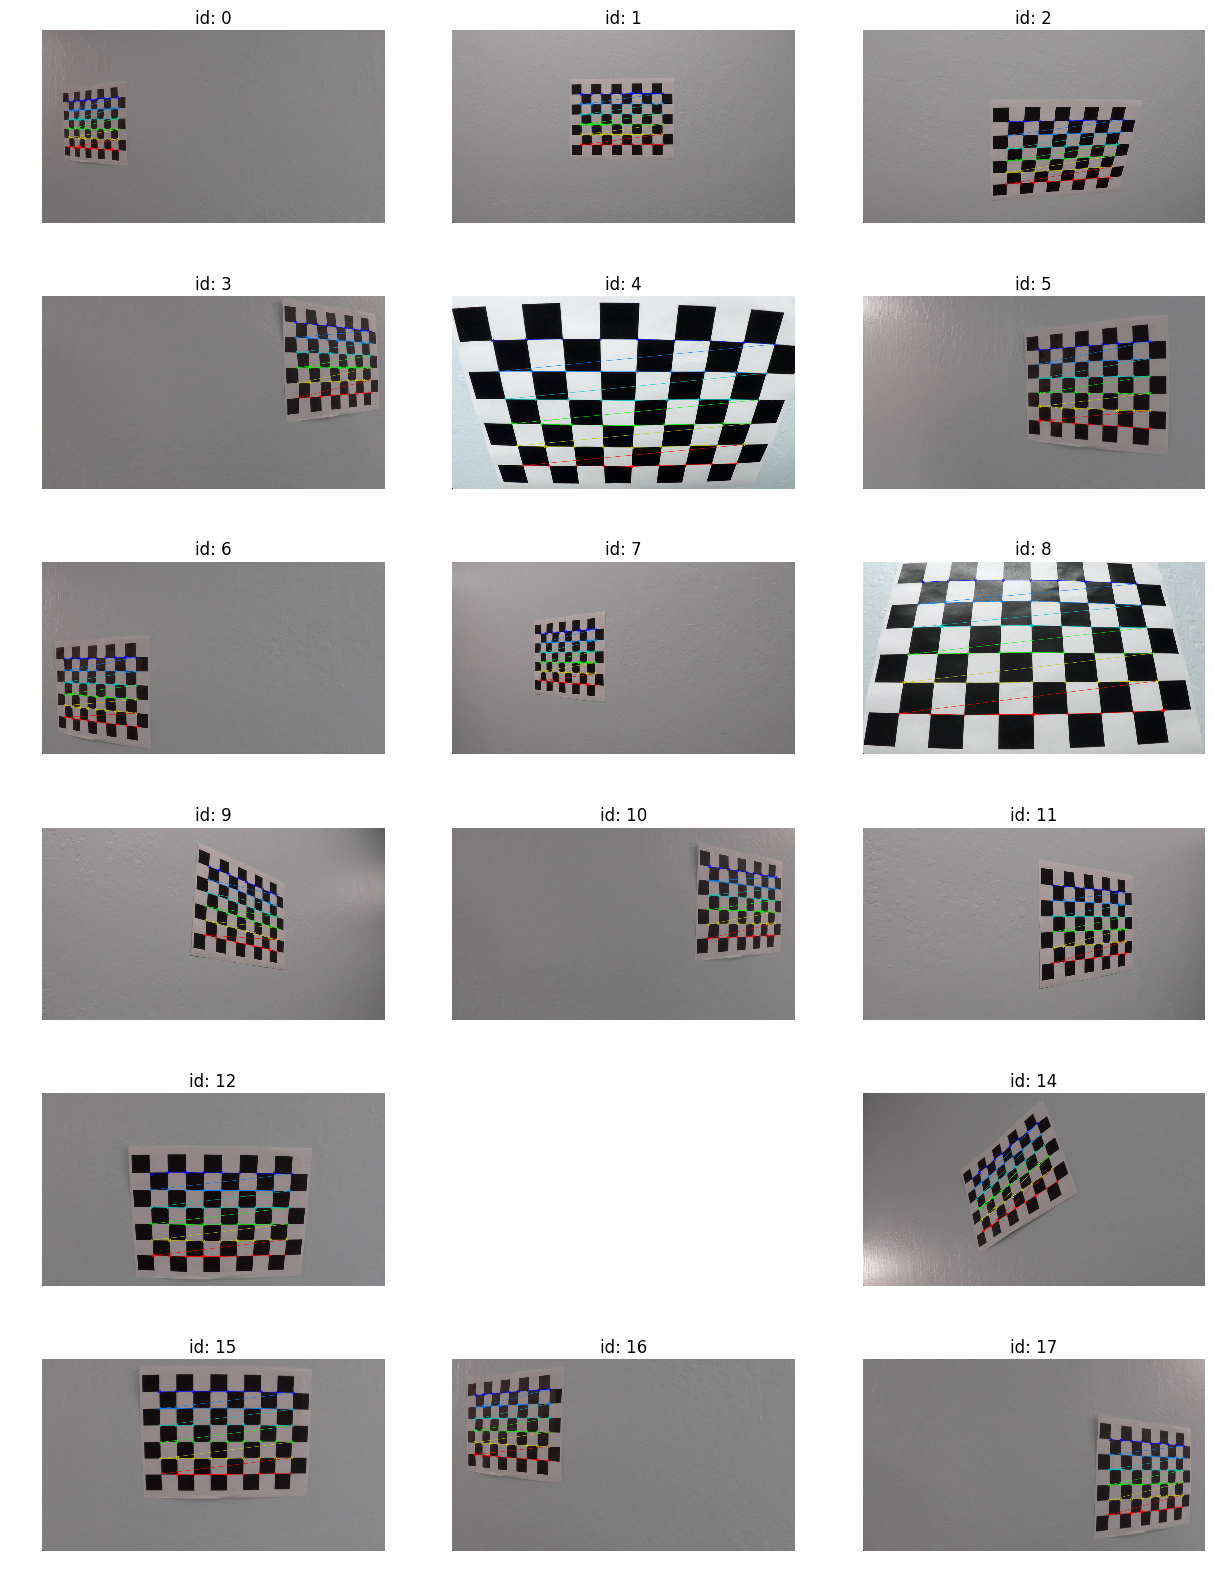

In [50]:
# Arrays to store object points and image points from all the images.
ls_object_points = [] # 3d points in real world space
ls_image_points = [] # 2d points in image plane.


cols = 3
rows = int(np.ceil(len(filtered_list)/float(cols)))
plt.figure(figsize=(15, 20)) # If figsize is not set properly, it will be impossible to see nothing

ls_drawn_images = list()

for idx, image_path in enumerate(filtered_list):
    
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If found, add object points and image points
    if ret == True:
        ls_object_points.append(objp)
        ls_image_points.append(corners)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
        ls_drawn_images.append(image)
        plt.subplot(rows, cols, idx+1)
        plt.imshow(image)
        plt.title("id: %d" % idx)
        _ = plt.axis('off')
        
    else:
        print("Corners in image %s not found." % os.path.basename(image_path))

In [63]:
# Do camera calibration given object points and image points
image_size = ls_drawn_images[0].shape
image_size = image_size[:2][::-1]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(ls_object_points, ls_image_points, image_size,None,None)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open(path2calib_im + "calibration_data.pkl", "wb" ) )

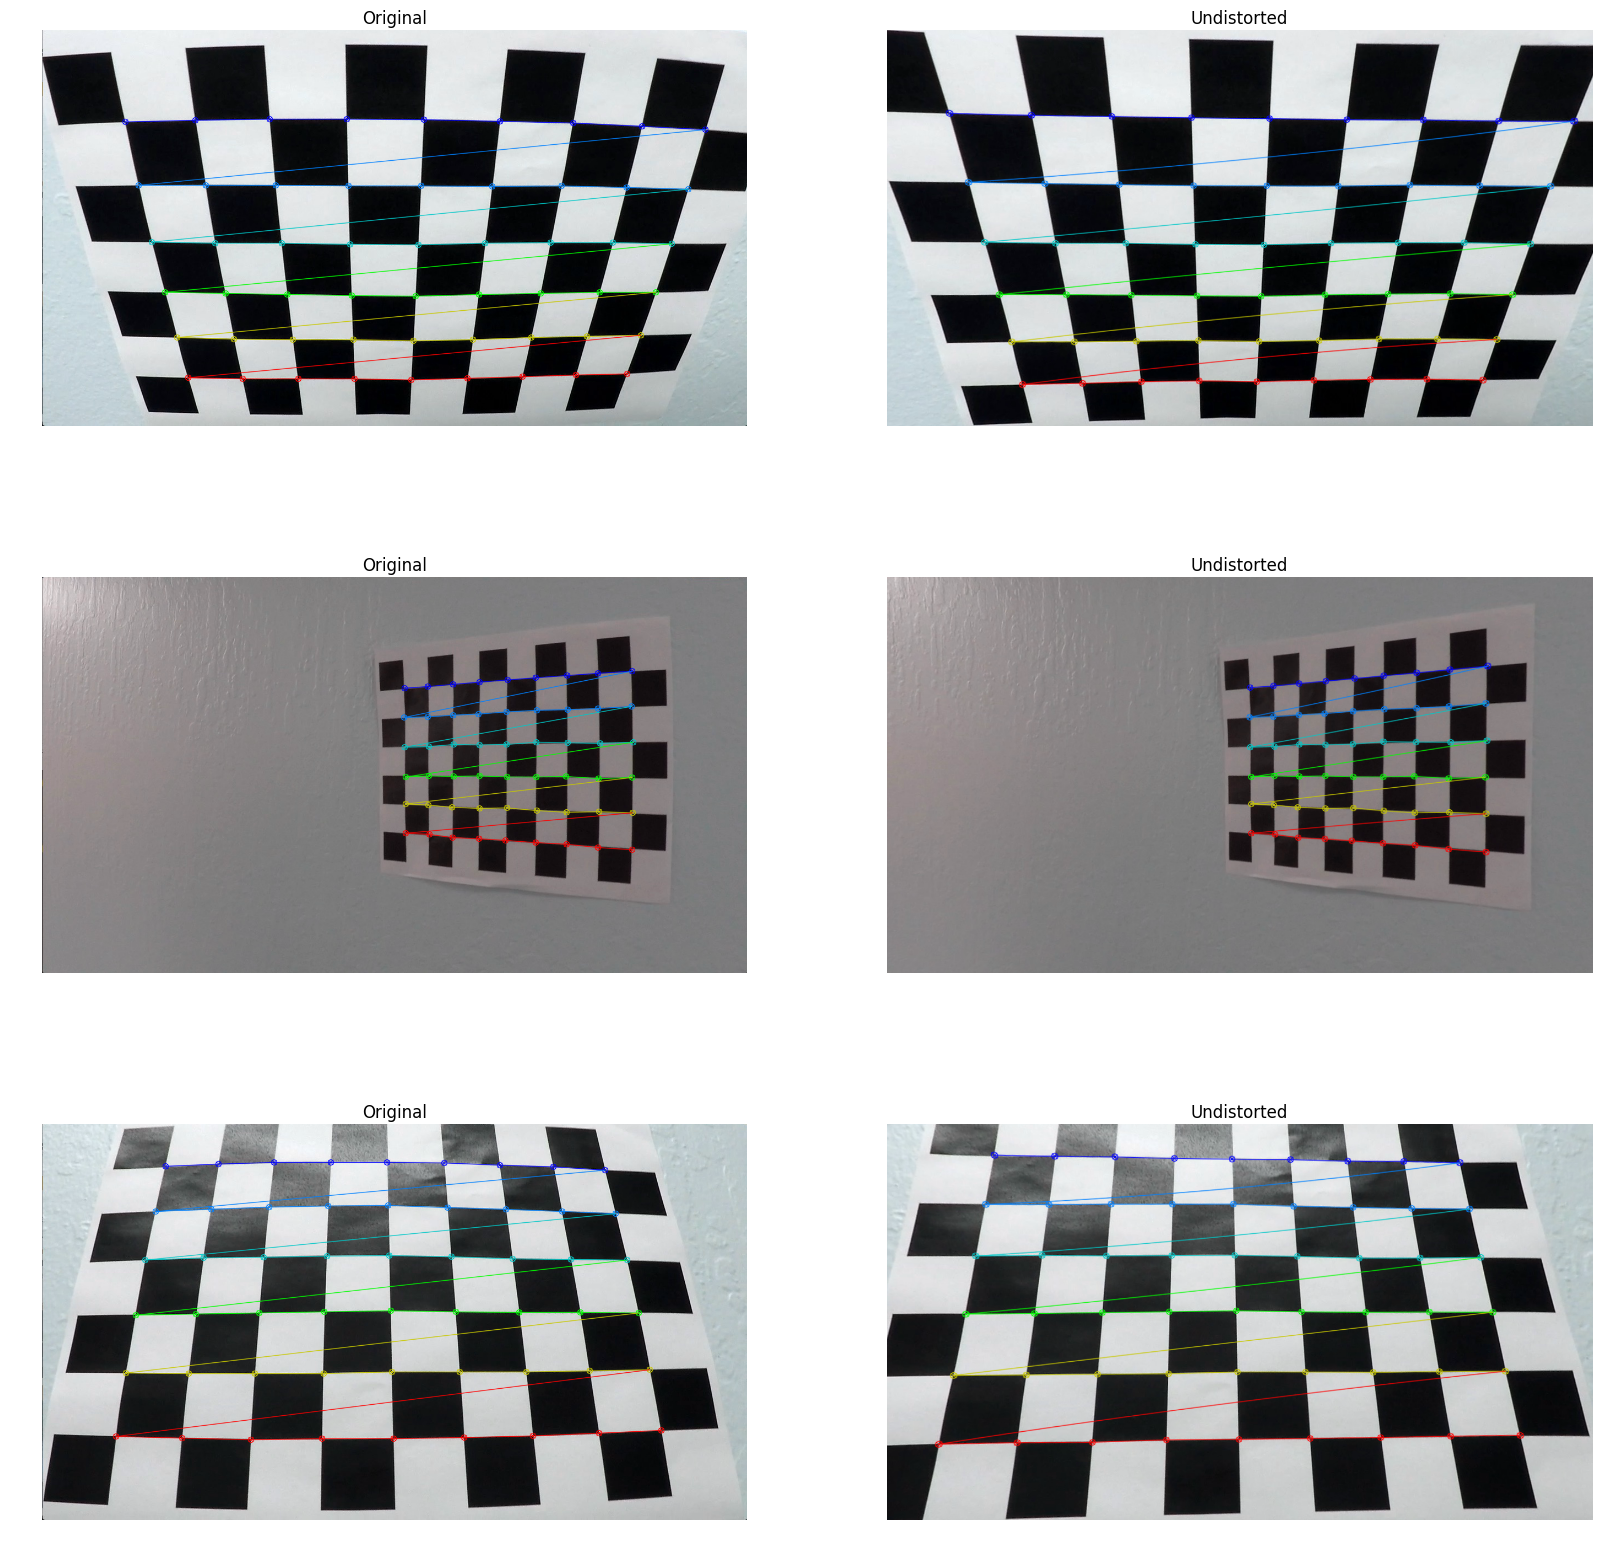

In [69]:
testing_images = [4, 5, 8]

plt.figure(figsize=(20,20))

num = 0

for idx in testing_images:
    dst = cv2.undistort(ls_drawn_images[idx], mtx, dist, None, mtx)
    
    plt.subplot(3, 2, num+1)
    plt.imshow(ls_drawn_images[idx])
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(3, 2, num+2)
    plt.imshow(dst)
    plt.title("Undistorted")
    plt.axis('off')
    
    num += 2

Lines that should be parallel, are parallel again.

We will have to undo perspective, but that's a different problem